In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


**Load Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


 **Load the Dataset**

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/crime rate prediction/RS_Session_255_AS_116.1 (1).csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.head())  # View first 5 rows



  Sl. No.           State/UT  Number of Cases Registered - 2018-19  \
0       1     Andhra Pradesh                                  1414   
1       2  Arunachal Pradesh                                    79   
2       3              Assam                                   312   
3       4              Bihar                                  4158   
4       5       Chhattisgarh                                   621   

   Number of Cases Registered - 2019-20  Number of Cases Registered - 2020-21  \
0                                  1866                                  2101   
1                                    48                                    59   
2                                   340                                   256   
3                                  3218                                  3880   
4                                   546                                   539   

   Number of Cases Registered - 2021-22 (up to 31.10.2021)  
0                              

In [ ]:
print(df.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Sl. No.                                                  40 non-null     object
 1   State/UT                                                 40 non-null     object
 2   Number of Cases Registered - 2018-19                     40 non-null     int64 
 3   Number of Cases Registered - 2019-20                     40 non-null     int64 
 4   Number of Cases Registered - 2020-21                     40 non-null     int64 
 5   Number of Cases Registered - 2021-22 (up to 31.10.2021)  40 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ KB
None


In [ ]:
print(df.describe())  # Summary statistics

       Number of Cases Registered - 2018-19  \
count                             40.000000   
mean                            4479.200000   
std                            15305.330617   
min                                1.000000   
25%                               51.500000   
50%                              747.500000   
75%                             2243.000000   
max                            89584.000000   

       Number of Cases Registered - 2019-20  \
count                             40.000000   
mean                            3831.400000   
std                            12910.134043   
min                                3.000000   
25%                               43.000000   
50%                              593.000000   
75%                             1892.500000   
max                            76628.000000   

       Number of Cases Registered - 2020-21  \
count                             40.000000   
mean                            3748.400000   
std        

**  Data Preprocessing**

In [ ]:
# Check for missing values
print(df.isnull().sum())

Sl. No.                                                    0
State/UT                                                   0
Number of Cases Registered - 2018-19                       0
Number of Cases Registered - 2019-20                       0
Number of Cases Registered - 2020-21                       0
Number of Cases Registered - 2021-22 (up to 31.10.2021)    0
dtype: int64


In [ ]:
# Encode categorical variables if needed
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.columns

Index(['Number of Cases Registered - 2018-19',
       'Number of Cases Registered - 2019-20',
       'Number of Cases Registered - 2020-21',
       'Number of Cases Registered - 2021-22 (up to 31.10.2021)', 'Sl. No._1',
       'Sl. No._10', 'Sl. No._11', 'Sl. No._12', 'Sl. No._13', 'Sl. No._14',
       'Sl. No._15', 'Sl. No._16', 'Sl. No._17', 'Sl. No._18', 'Sl. No._19',
       'Sl. No._2', 'Sl. No._20', 'Sl. No._21', 'Sl. No._22', 'Sl. No._23',
       'Sl. No._24', 'Sl. No._25', 'Sl. No._26', 'Sl. No._27', 'Sl. No._28',
       'Sl. No._29', 'Sl. No._3', 'Sl. No._30', 'Sl. No._31', 'Sl. No._32',
       'Sl. No._33', 'Sl. No._34', 'Sl. No._35', 'Sl. No._36', 'Sl. No._37',
       'Sl. No._38', 'Sl. No._39', 'Sl. No._4', 'Sl. No._5', 'Sl. No._6',
       'Sl. No._7', 'Sl. No._8', 'Sl. No._9', 'State/UT_All Over India',
       'State/UT_Andaman & Nicobar Islands', 'State/UT_Andhra Pradesh',
       'State/UT_Arunachal Pradesh', 'State/UT_Assam', 'State/UT_Bihar',
       'State/UT_Chandigarh'

In [ ]:
# Display first 5 rows
df.head()

,Number of Cases Registered - 2018-19,Number of Cases Registered - 2019-20,Number of Cases Registered - 2020-21,Number of Cases Registered - 2021-22 (up to 31.10.2021),Sl. No._1,Sl. No._10,Sl. No._11,Sl. No._12,Sl. No._13,Sl. No._14,...,State/UT_Puducherry,State/UT_Punjab,State/UT_Rajasthan,State/UT_Sikkim,State/UT_Tamil Nadu,State/UT_Telangana,State/UT_Tripura,State/UT_Uttar Pradesh,State/UT_Uttarakhand,State/UT_West Bengal
0,1414,1866,2101,1532,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79,48,59,27,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,312,340,256,330,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4158,3218,3880,3379,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,621,546,539,493,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
print(df.isnull().sum())


Number of Cases Registered - 2018-19                       0
Number of Cases Registered - 2019-20                       0
Number of Cases Registered - 2020-21                       0
Number of Cases Registered - 2021-22 (up to 31.10.2021)    0
Sl. No._1                                                  0
                                                          ..
State/UT_Telangana                                         0
State/UT_Tripura                                           0
State/UT_Uttar Pradesh                                     0
State/UT_Uttarakhand                                       0
State/UT_West Bengal                                       0
Length: 82, dtype: int64


In [ ]:
# Display cleaned dataset
df.head()

,Number of Cases Registered - 2018-19,Number of Cases Registered - 2019-20,Number of Cases Registered - 2020-21,Number of Cases Registered - 2021-22 (up to 31.10.2021),Sl. No._1,Sl. No._10,Sl. No._11,Sl. No._12,Sl. No._13,Sl. No._14,...,State/UT_Puducherry,State/UT_Punjab,State/UT_Rajasthan,State/UT_Sikkim,State/UT_Tamil Nadu,State/UT_Telangana,State/UT_Tripura,State/UT_Uttar Pradesh,State/UT_Uttarakhand,State/UT_West Bengal
0,1414,1866,2101,1532,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79,48,59,27,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,312,340,256,330,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4158,3218,3880,3379,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,621,546,539,493,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Drop unnecessary columns (Sl. No. columns)
df = df.drop(columns=[col for col in df.columns if "Sl. No." in col])


In [ ]:
# Rename columns for easier access
df.rename(columns={
    'Number of Cases Registered - 2018-19': 'Cases_2018',
    'Number of Cases Registered - 2019-20': 'Cases_2019',
    'Number of Cases Registered - 2020-21': 'Cases_2020',
    'Number of Cases Registered - 2021-22 (up to 31.10.2021)': 'Cases_2021'
}, inplace=True)


In [ ]:

# Display cleaned dataset
df.head()

,Cases_2018,Cases_2019,Cases_2020,Cases_2021,State/UT_All Over India,State/UT_Andaman & Nicobar Islands,State/UT_Andhra Pradesh,State/UT_Arunachal Pradesh,State/UT_Assam,State/UT_Bihar,...,State/UT_Puducherry,State/UT_Punjab,State/UT_Rajasthan,State/UT_Sikkim,State/UT_Tamil Nadu,State/UT_Telangana,State/UT_Tripura,State/UT_Uttar Pradesh,State/UT_Uttarakhand,State/UT_West Bengal
0,1414,1866,2101,1532,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79,48,59,27,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,312,340,256,330,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4158,3218,3880,3379,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,621,546,539,493,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Exploratory Data Analysis (EDA)**

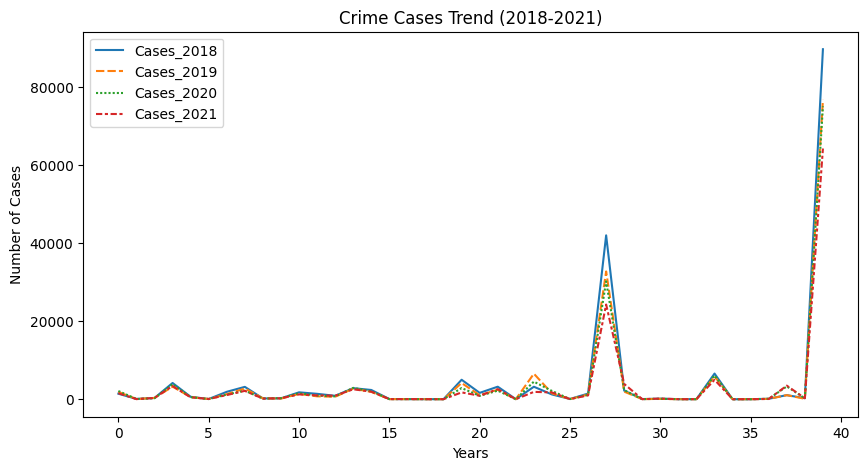

In [ ]:
# Plot crime rate trends over the years
plt.figure(figsize=(10,5))
sns.lineplot(data=df[['Cases_2018', 'Cases_2019', 'Cases_2020', 'Cases_2021']])
plt.title("Crime Cases Trend (2018-2021)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.show()



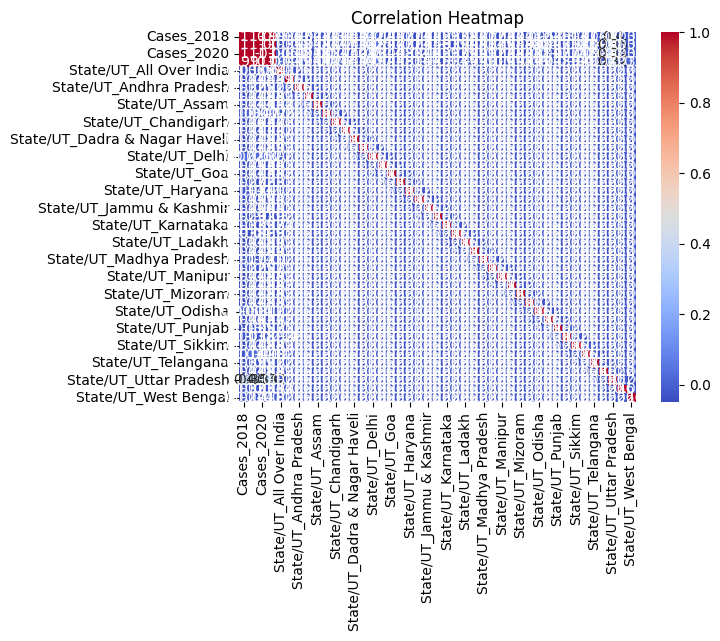

In [ ]:

# Check correlations
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

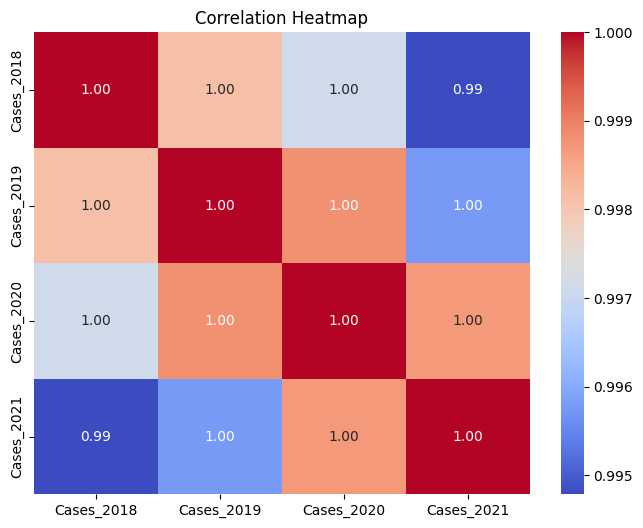

In [ ]:
# Check correlations (using only numeric columns)
# Select numeric columns from the original DataFrame 'df'
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

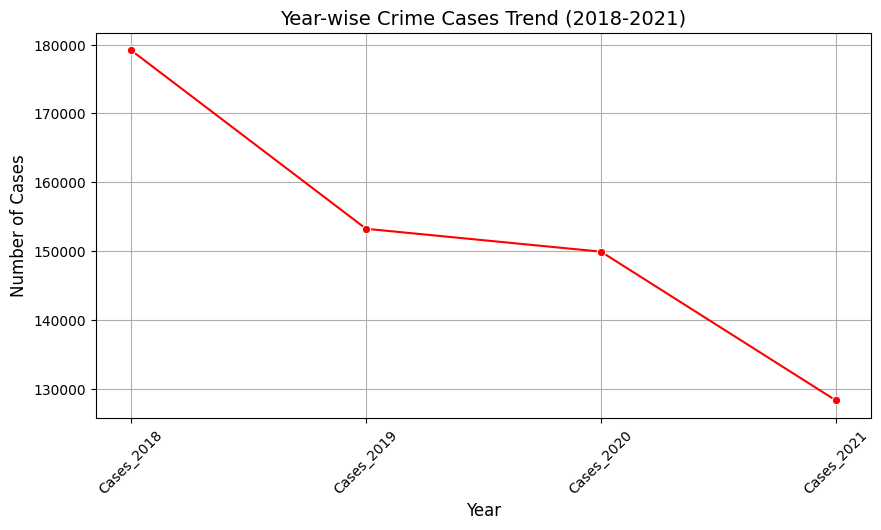

In [ ]:


# Rename columns for easier plotting
df.rename(columns={
    'Number of Cases Registered - 2018-19': 'Cases_2018',
    'Number of Cases Registered - 2019-20': 'Cases_2019',
    'Number of Cases Registered - 2020-21': 'Cases_2020',
    'Number of Cases Registered - 2021-22 (up to 31.10.2021)': 'Cases_2021'
}, inplace=True)

# Calculate total cases for each year
yearly_cases = df[['Cases_2018', 'Cases_2019', 'Cases_2020', 'Cases_2021']].sum()

# Plot the crime trend over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker='o', linestyle='-', color='red')

# Labeling
plt.title("Year-wise Crime Cases Trend (2018-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [ ]:

# Selecting features (independent variables) and target (dependent variable)
X = df[['Cases_2018', 'Cases_2019', 'Cases_2020']]  # Past data as input
y = df['Cases_2021']  # Predicting crime rate in 2021

# Splitting data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split # make sure train_test_split is imported.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Feature Selection & Train-Test Split**

In [ ]:
# Selecting features (independent variables) and target (dependent variable)
X = df[['Cases_2018', 'Cases_2019', 'Cases_2020']]  # Past data as input
y = df['Cases_2021']  # Predicting crime rate in 2021



In [ ]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Display shape of train and test sets
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (32, 3), Test set size: (8, 3)


 **Train the Model**

In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

**Evaluate the Model**

In [ ]:

# Predictions
y_pred = lr.predict(X_test)

# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-Squared Score

# Model Score (Accuracy on Train & Test Data)
train_score = lr.score(X_train, y_train)  # R² Score on Training Data
test_score = lr.score(X_test, y_test)  # R² Score on Testing Data

# Print Results
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared Score (R²): {r2:.2f}")

# Print Model Score
print(f" Model Score on Training Data: {train_score:.2f}")
print(f" Model Score on Testing Data: {test_score:.2f}")


 Mean Absolute Error (MAE): 461.43
 Mean Squared Error (MSE): 877113.66
 Root Mean Squared Error (RMSE): 936.54
 R-squared Score (R²): 0.99
 Model Score on Training Data: 1.00
 Model Score on Testing Data: 0.99


In [ ]:
import joblib

# Save model
joblib.dump(lr, 'crime_model.pkl')

['crime_model.pkl']

In [ ]:
!pip install streamlit
!pip install pyngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load trained model
model = joblib.load('crime_prediction_model.pkl')

# Title of the web app
st.title("Crime Rate Prediction for 2022")

# Input fields for user data (You can customize this based on your model's input)
cases_2019 = st.number_input("Enter number of cases in 2019")
cases_2020 = st.number_input("Enter number of cases in 2020")
cases_2021 = st.number_input("Enter number of cases in 2021")

# Button to make predictions
if st.button('Predict Crime Rate for 2022'):
    # Prepare the data for prediction
    input_data = np.array([[cases_2019, cases_2020, cases_2021]])

    # Make prediction
    prediction = model.predict(input_data)

    # Display the prediction result
    st.write(f"Predicted Crime Cases for 2022: {int(prediction[0])}")


Writing app.py


In [ ]:
!ngrok authtoken 2vciN5B0UJuLYTN0ZuAV4U83T7m_64AqeP3wYU7iEFC5njJ7k

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Step 1: Install required packages
!pip install streamlit pyngrok

# Step 2: Authenticate ngrok
!ngrok authtoken 2vciN5B0UJuLYTN0ZuAV4U83T7m_64AqeP3wYU7iEFC5njJ7k




Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Step 3: Create Streamlit app
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load trained model
model = joblib.load('crime_prediction_model.pkl')

# Title of the web app
st.title("Crime Rate Prediction for 2022")

# Input fields for user data (You can customize this based on your model's input)
cases_2019 = st.number_input("Enter number of cases in 2019")
cases_2020 = st.number_input("Enter number of cases in 2020")
cases_2021 = st.number_input("Enter number of cases in 2021")

# Button to make predictions
if st.button('Predict Crime Rate for 2022'):
    # Prepare the data for prediction
    input_data = np.array([[cases_2019, cases_2020, cases_2021]])

    # Make prediction
    prediction = model.predict(input_data)

    # Display the prediction result
    st.write(f"Predicted Crime Cases for 2022: {int(prediction[0])}")

# Step 4: Create a tunnel with pyngrok and run the app
from pyngrok import ngrok

# Set up a tunnel to the Streamlit port
public_url = ngrok.connect(port='8501')

# Display the public URL
print(f"Streamlit app is running at: {public_url}")

Overwriting app.py


In [ ]:
# Run the Streamlit app
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.45.189.200:8501



 **Predict Crime Cases for Future Years**

In [ ]:

# Create a DataFrame for latest known data (2019, 2020, 2021) using their mean values
# Use the renamed column names: Cases_2018, Cases_2019, Cases_2020
latest_data_df = pd.DataFrame([[df['Cases_2018'].mean(),
                                df['Cases_2019'].mean(),
                                df['Cases_2020'].mean()]],
                              columns=X_train.columns)  # Use same column names

# Predict crime cases for 2022
predicted_cases_2022 = lr.predict(latest_data_df)
print(f"📌 Predicted Crime Cases for 2022: {int(predicted_cases_2022[0])}")

# Predict crime cases for the next 5 years (2023-2027)
future_years = [2023, 2024, 2025, 2026, 2027]
predictions = []

# Use the latest predicted value as the previous year's data for future predictions
prev_prediction = predicted_cases_2022[0]

for year in future_years:
    # Assume a simple linear trend (increment by the same rate as the previous years)
    # Use the renamed column names: Cases_2018, Cases_2019, Cases_2020, Cases_2021
    future_data_df = pd.DataFrame([[prev_prediction, df['Cases_2019'].mean(),
                                     df['Cases_2020'].mean()]],  # Assuming Cases_2019 and Cases_2020 are relevant
                                  columns=X_train.columns)

    future_prediction = lr.predict(future_data_df)[0]
    predictions.append((year, int(future_prediction)))

    # Update previous prediction
    prev_prediction = future_prediction

# Display predictions
for year, cases in predictions:
    print(f" Predicted Crime Cases for {year}: {cases}")


📌 Predicted Crime Cases for 2022: 3286
 Predicted Crime Cases for 2023: 2854
 Predicted Crime Cases for 2024: 2698
 Predicted Crime Cases for 2025: 2641
 Predicted Crime Cases for 2026: 2621
 Predicted Crime Cases for 2027: 2613


In [ ]:
import joblib

# Save model
joblib.dump(lr, 'crime_model.pkl')


['crime_model.pkl']